In [16]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from A2C_clean_A1 import A2C
from tqdm import tqdm
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SETUP

In [26]:
# environment hyperparams
#option 1 :  use n_updates to define n_steps
n_updates = 500000
n_envs = 1
n_steps_per_update = 1
n_steps = n_envs * n_steps_per_update * n_updates

#option 2 :  use n_steps to define n_updates
#n_steps = 500000
#n_updates = n_steps // (n_envs * n_steps_per_update) # number of updates

# agent hyperparams
gamma = 0.99  # discount factor
ent_coef = 0.01  # coefficient for the entropy bonus (to encourage exploration)
actor_lr = 1e-5
critic_lr = 1e-3

# Note: the actor has a slower learning rate so that the value targets become
# more stationary and are theirfore easier to estimate for the critic

# environment setup
#envs = gym.vector.make("CartPole-v1", num_envs=n_envs)
env = gym.make("CartPole-v1")

obs_shape = env.observation_space.shape[0]
print(obs_shape)
action_shape = env.action_space.n
print(action_shape)
# set the device
use_cuda = False
if use_cuda:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")

# init the agent
agent = A2C(obs_shape, action_shape, device, critic_lr, actor_lr, n_envs = 1)

4
2


In [27]:
# LOGGED VARIABLES
critic_losses = []
actor_losses = []
ep_rewards = []
entropies = []
steps_episodes = [] # logs the steps taken in each episode
# COUNTERS
steps_counter = 0
ep_counter = 0
ep_reward = 0

# VARIABLE INITIALIZATION
is_truncated = False
is_terminated = False
state, info = env.reset(seed=42)


# TRAINING LOOP (using n_steps as the number of steps to train for)
for sample_phase in tqdm(range(n_steps)):
    
    if is_truncated == True or is_terminated == True:
        state,info = env.reset(seed=42)
        is_truncated = False
        is_terminated = False
        ep_counter += 1
        steps_episodes.append(steps_counter)
        ep_rewards.append(ep_reward)
        ep_reward = 0



    #collect experiences for a step
    action, action_log_prob, Vs_t1, entropy = agent.select_action(state, bool_greedy=False)
    with torch.no_grad():
        state, reward, is_terminated,is_truncated, info = env.step(action.numpy())
        steps_counter += 1
        ep_reward += reward
        mask = not is_terminated
    
    #calculate loss
    critic_loss, actor_loss = agent.get_losses(
        reward,
        action_log_prob,
        Vs_t1,
        entropy,
        mask,
        gamma,
        torch.tensor(state),
    )
    

    #update agent 
    agent.update_parameters(critic_loss, actor_loss)


    #log data
    critic_losses.append(critic_loss.detach().numpy()) #detach for plotting later, need to detach
    actor_losses.append(actor_loss.detach().numpy())
    entropies.append(entropy)
    
    
       

        


  0%|          | 61/500000 [00:00<27:55, 298.44it/s]

Value preds :  tensor([1.1841], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([3.0381], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([3.8403], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 120/500000 [00:00<29:02, 286.83it/s]

Value preds :  tensor([6.7897], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([6.2944], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 208/500000 [00:00<29:25, 283.01it/s]

Value preds :  tensor([11.9589], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([12.2744], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([12.3290], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 265/500000 [00:00<30:18, 274.86it/s]

Value preds :  tensor([12.8959], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([12.8253], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([13.0841], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 324/500000 [00:01<33:56, 245.35it/s]

Value preds :  tensor([13.1376], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([11.6610], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([13.3382], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 450/500000 [00:01<28:46, 289.31it/s]

Value preds :  tensor([14.4171], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([13.2516], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([9.7832], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 540/500000 [00:02<33:23, 249.25it/s]

Value preds :  tensor([14.8984], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([9.2593], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 592/500000 [00:02<38:14, 217.63it/s]

Value preds :  tensor([15.4855], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([8.6789], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([17.3388], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 704/500000 [00:02<31:35, 263.35it/s]

Value preds :  tensor([18.2315], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([18.0782], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([14.3048], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 760/500000 [00:02<31:47, 261.78it/s]

Value preds :  tensor([5.3370], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([-1.1695], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([14.9393], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 817/500000 [00:03<32:19, 257.36it/s]

Value preds :  tensor([13.1381], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([18.0672], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([9.0990], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 844/500000 [00:03<33:24, 249.05it/s]

Value preds :  tensor([6.3386], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([7.3740], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 927/500000 [00:03<38:27, 216.29it/s]

Value preds :  tensor([17.6083], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([17.4986], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False
Value preds :  tensor([1.6614], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


  0%|          | 972/500000 [00:03<33:22, 249.22it/s]


Value preds :  tensor([17.1924], grad_fn=<ViewBackward0>)
Qval :  tensor(1.)
mask :  False


KeyboardInterrupt: 

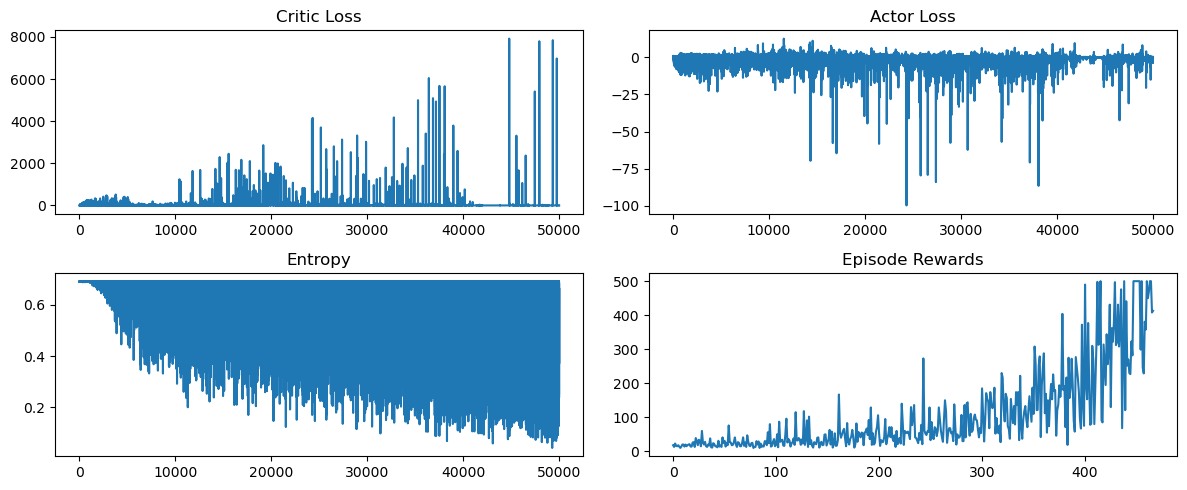

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))
axs[0, 0].plot(critic_losses)
axs[0, 0].set_title('Critic Loss')
axs[0, 1].plot(actor_losses)
axs[0, 1].set_title('Actor Loss')
axs[1, 0].plot(entropies)
axs[1, 0].set_title('Entropy')
axs[1, 1].plot(ep_rewards)
axs[1, 1].set_title('Episode Rewards')
plt.tight_layout()
plt.show()


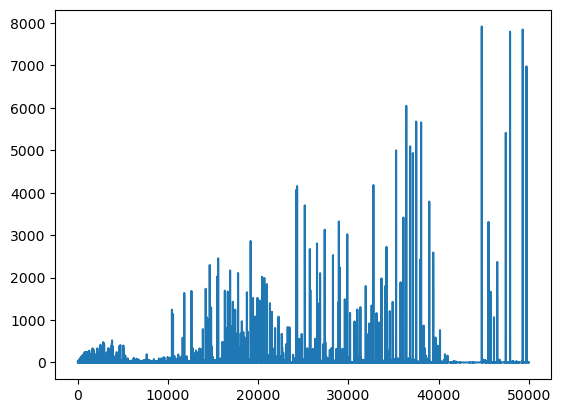

In [24]:
# PLOTTING

plt.plot(critic_losses)


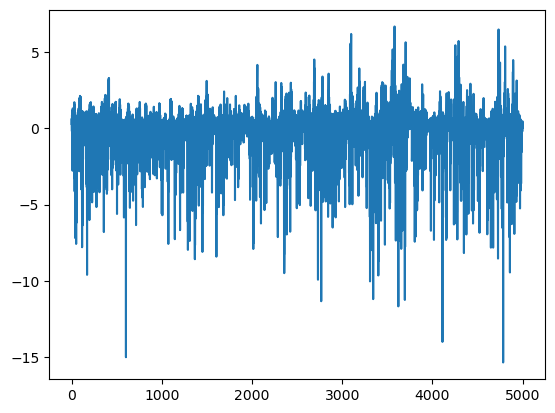

In [21]:
plt.plot(actor_losses)

In [22]:
steps_episodes

[41,
 56,
 107,
 125,
 172,
 217,
 252,
 280,
 310,
 354,
 426,
 461,
 504,
 550,
 584,
 603,
 647,
 688,
 728,
 766,
 791,
 840,
 882,
 923,
 953,
 989,
 1007,
 1052,
 1073,
 1131,
 1148,
 1167,
 1212,
 1244,
 1295,
 1326,
 1352,
 1376,
 1420,
 1463,
 1526,
 1576,
 1611,
 1659,
 1702,
 1741,
 1783,
 1832,
 1871,
 1986,
 2024,
 2100,
 2159,
 2199,
 2274,
 2290,
 2347,
 2364,
 2402,
 2465,
 2511,
 2557,
 2625,
 2660,
 2705,
 2751,
 2794,
 2831,
 2883,
 2903,
 2936,
 2994,
 3060,
 3218,
 3297,
 3316,
 3338,
 3355,
 3396,
 3414,
 3514,
 3610,
 3651,
 3692,
 3773,
 3827,
 3854,
 3911,
 3996,
 4037,
 4128,
 4199,
 4268,
 4327,
 4361,
 4438,
 4482,
 4515,
 4544,
 4623,
 4661,
 4685,
 4781,
 4831,
 4866,
 4954,
 4992]

In [17]:
len(ep_rewards)

180

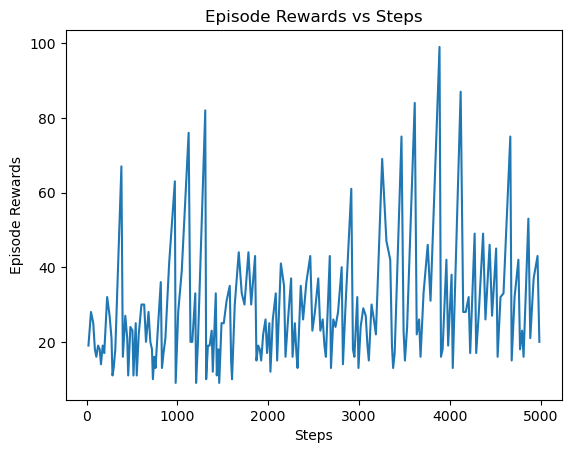

In [18]:
import matplotlib.pyplot as plt

# Assuming you have the following variables defined:
# ep_rewards: list of episode rewards
# steps_episodes: list of step counts at the end of each episode

# Plotting the data
plt.plot(steps_episodes, ep_rewards)
plt.xlabel('Steps')
plt.ylabel('Episode Rewards')
plt.title('Episode Rewards vs Steps')
plt.show()

# SHOWCASE

In [14]:
n_showcase_episodes = 3

for episode in range(n_showcase_episodes):
    print(f"starting episode {episode}...")

    # create a new sample environment to get new random parameters
    env = gym.make("CartPole-v1", render_mode="human", max_episode_steps=500)

    # get an initial state
    state, info = env.reset()

    # play one episode
    done = False
    while not done:
        # select an action A_{t} using S_{t} as input for the agent
        with torch.no_grad():
            action, _, _, _ = agent.select_action(state,bool_greedy=True)

        # perform the action A_{t} in the environment to get S_{t+1} and R_{t+1}
        state, reward, terminated, truncated, info = env.step(action.numpy())

        # update if the environment is done
        done = terminated or truncated

env.close()

starting episode 0...


/opt/anaconda3/envs/rl_project/lib/python3.9/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


starting episode 1...
starting episode 2...


: 